In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings (optional)
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
DATA_PATH = "../data/raw/telco_customer_churn.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("Shape:", df.shape)
print("\nInfo:")
display(df.info())

print("\nMissing values per column:")
display(df.isna().sum())

print("\nChurn distribution:")
display(df["Churn"].value_counts())
print("\nChurn rate (%):")
display(df["Churn"].value_counts(normalize=True) * 100)

Shape: (7043, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

None


Missing values per column:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Churn distribution:


Churn
No     5174
Yes    1869
Name: count, dtype: int64


Churn rate (%):


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [4]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

print("TotalCharges missing after conversion:", df["TotalCharges"].isna().sum())

df = df.dropna(subset=["TotalCharges"]).reset_index(drop=True)
print("New shape after dropping missing TotalCharges:", df.shape)

TotalCharges missing after conversion: 11
New shape after dropping missing TotalCharges: (7032, 21)


In [5]:
bins = [0, 12, 24, 48, 72]  # months
labels = ["0-12", "13-24", "25-48", "49+"]

df["tenure_group"] = pd.cut(df["tenure"], bins=bins, labels=labels, include_lowest=True)

df["tenure_group"].value_counts().sort_index()

tenure_group
0-12     2175
13-24    1024
25-48    1594
49+      2239
Name: count, dtype: int64

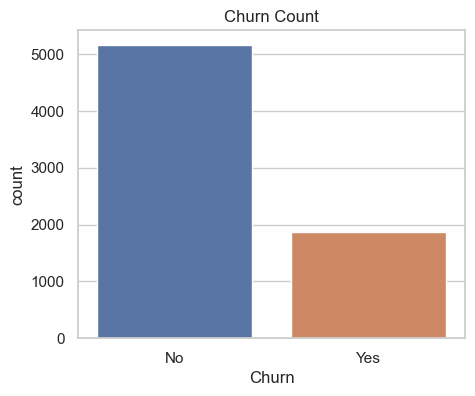

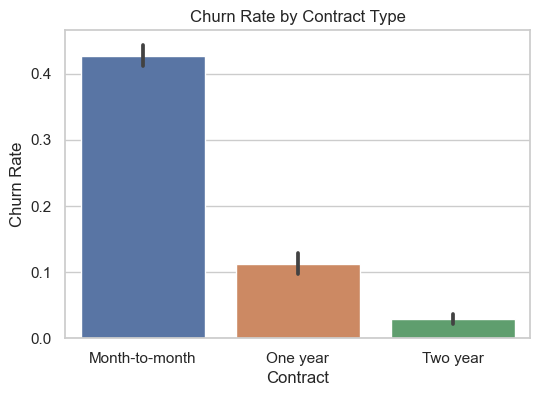

In [6]:
# Churn count
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="Churn")
plt.title("Churn Count")
plt.show()

# Churn rate by contract type
plt.figure(figsize=(6, 4))
sns.barplot(
    data=df,
    x="Contract",
    y=df["Churn"].apply(lambda x: 1 if x == "Yes" else 0),
    estimator=np.mean,
)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.show()

In [7]:
OUTPUT_PATH = "../data/processed/telco_churn_processed.csv"
df.to_csv(OUTPUT_PATH, index=False)
OUTPUT_PATH

'../data/processed/telco_churn_processed.csv'